In [6]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as sm

%matplotlib inline


* 3.1 Simple Linear Regression

* 3.3 Multiple Linear Regression and Interpreting Regression Coefficients

<img src="https://www.dropbox.com/s/fe94fcmhkpngnnc/IFSL.png?dl=1" alt="drawing" style="width:300px;"/>

* An excellent reference for statistical learning


### Single (simple) Linear Regression

* A simple method to predict a *quantitative* response $y$ on the basis of a single predictor variable $X$
  * Here, in the general case $X$ refers to a vector or one or more variables
  * We consider a single variable $X$ to start; hence simple linear regression.
- Assume an approximately linear relationship between $X$ and $y$


- Remember that the equation of a line is:

$$
    Y = \beta_0 + \beta_1 * X,
$$

* Where: 
  * $\beta_0$ the intercept of the equation
  * $\beta_1$ the slope





Text(0.5, 1.0, '$y = 1.2 x +2$')

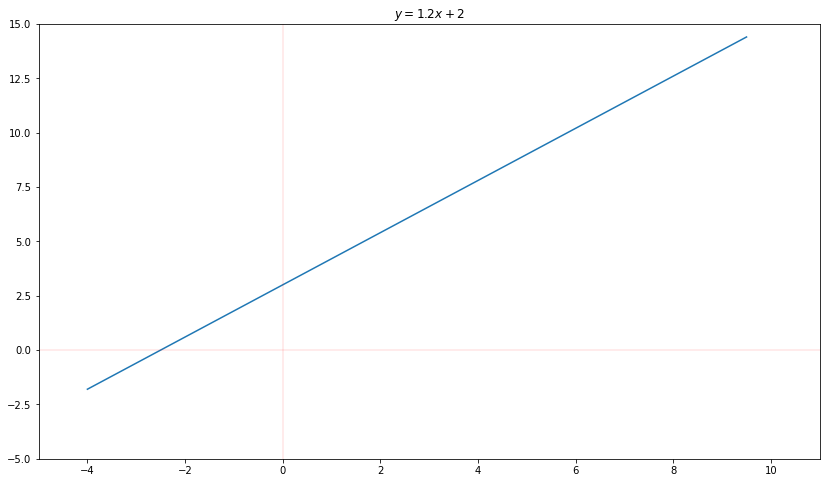

In [7]:

x = np.arange(-4, 10, 0.5)
plt.figure(figsize=(14,8))

y = 1.2*x + 3

plt.plot(x, y)
plt.xlim(-5,11)
plt.ylim(-5,15)
plt.axhline(0, color="red", alpha=0.1)
plt.axvline(0, color="red", alpha=0.1)
plt.title("$y = 1.2 x +2$") 


### line exmaple

```python
x = np.arange(-4, 10, 0.5)
plt.figure(figsize=(14,8))

y = 1.2*x + 3
```
![](https://www.dropbox.com/s/rn3zvhsin8bnb42/line_example.png?dl=1)

### Advertizing Datasets

- Displays `sales` (in thousands of units) for some product as a function of advertising budgets (in thousands of dollars) for `TV`, `radio`, and `newspaper`.

* Some of the questions we are interested in -- and can answer using linear regression --are :

  * Which medium or combination of) (if any) contribute to sales?
  * How accurately can we estimate the effect of each medium on sales?
  * Is there Synergy between the advertising media?
    * Interaction between TV and radio?

* Etc.


In [8]:
# https://www.dropbox.com/s/yjbso07nqjg0bbk/Advertising.csv?dl=1

advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Sales vs. TV spending

* What Does the data look like?
* How can we model it?
  * A model is simply an informative represntation of some data
    * May be simplified or inexact

![](https://www.dropbox.com/s/ugx6olqquvn49i8/data_plot.png?dl=1)

### Linear Regression

* The SciPy open-source package contains a wealth of data analysis modules, including the stats module which can be used to do a linear regression.
  * Other packages like pandas, `scikit-learn`, and MLlib can also be used. 
  * The logic and results are pretty much the same.

* `linregress` function in the `scipy.stats` module returns the intercept $\beta_0$ and the slope $\beta_1$ of the linear relationship between sales and advertising budget for TV

$$
    sales \approx \beta_0 + \beta_1 * TV
$$

* Together, $\beta_0$ and $\beta_1$ are known as the model parameters


In [9]:
from scipy.stats import linregress

linreg = linregress(advertising["TV"], advertising["sales"])
linreg

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

In [10]:
print(f"The slope is: {linreg.slope}")

print(f"The Interecept is: {linreg.intercept}")

# More on p-value later
print(f"The p.value is: {linreg.pvalue}")

The slope is: 0.0475366404330197
The Interecept is: 7.032593549127702
The p.value is: 1.4673897001948012e-42


### The Model Representation

* What we have derived is a model that represents `sales` as an outcome, predicted of the output variable 
* Nomenclature can be confusing sometimes. Depending on the fields:
  * `Sales` can be referred to as dependent variables, response (responding) variable, regressand, predicted variable, explained variable, outcome (output) variable.
  * `TV` can be referred to as feature, independent variable, predictor variable, regressor, covariate, explanatory variable, risk factor (see medical statistics)
    * Will use the term explanatory or independent variable

![](https://www.dropbox.com/s/kwq5utavokeadaj/line_model.png?dl=1)

### The Model Representation

* The model that we derived is a line
* The model has two parameters, a slope, and an intercept
* The model summarizes/describes the data

![](https://www.dropbox.com/s/b3ijojd8sq7l747/line_regression_line.png?dl=1)

### Predicting a Value

* The model allows us to predict reponse variable values (`sales`) gievn any input variable (`TV`)

$$ 
sales = \beta_0 \times TV + \beta_1
$$

![](https://www.dropbox.com/s/wlmeljxdkltwgnu/prediction.png?dl=1)


In [59]:
some_tv_advertising = 250

some_sales_prediction = linreg.slope * some_tv_advertising + linreg.intercept 

print(some_sales_prediction)

18.91675365738263


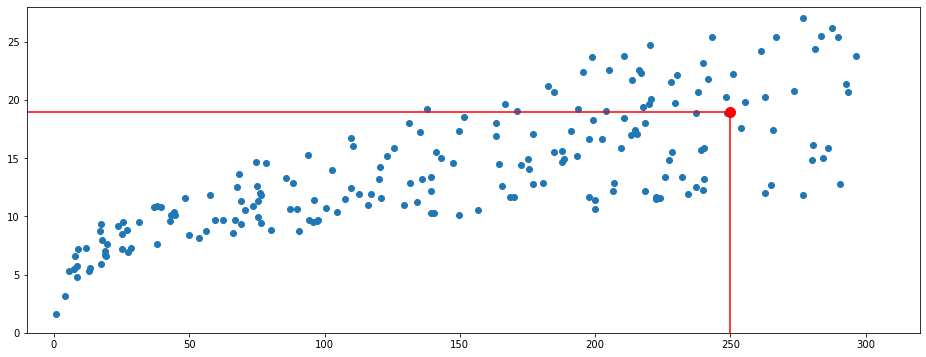

In [60]:
plt.figure(figsize=(16,6))
some_tv_advertising = 250
some_sales_prediction = linreg.intercept + linreg.slope * some_tv_advertising
plt.scatter(advertising["TV"], advertising["sales"])
plt.xlim(-10, 320)
plt.ylim(0, 28)
plt.vlines(some_tv_advertising, 0, some_sales_prediction, color='red')
plt.hlines(some_sales_prediction, -10, some_tv_advertising, color='red')
plt.scatter(some_tv_advertising, some_sales_prediction, s=100, color='red')


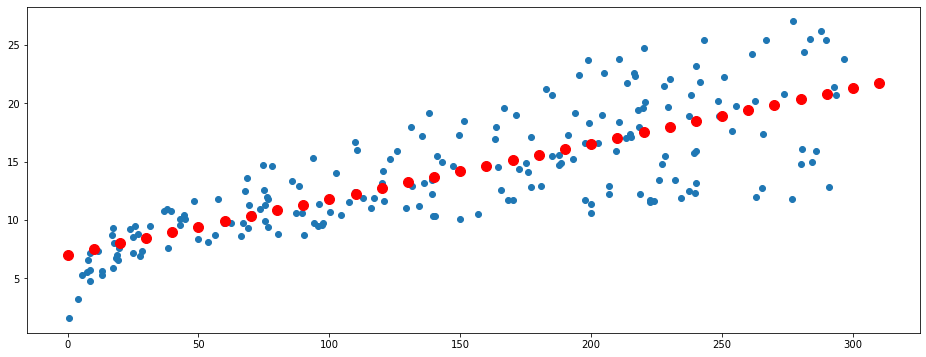

In [61]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320, 10)

y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"])
plt.scatter(x_axis, y_line, color='red', s=100)

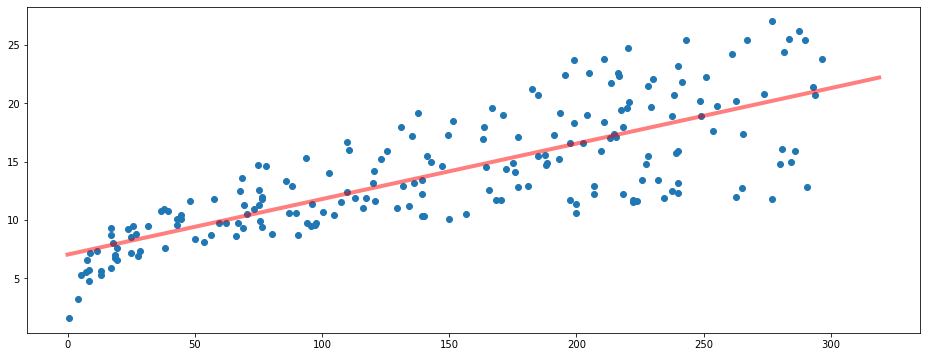

In [7]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"])
plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5)

### The Quality of the Regression: Model Error

* In this model, the error is the difference between the predicted value and the actual value
  * Intuitive... a perfect model is one that passes through (predicts without error) all the values.

* If  $\hat{y}_i = \beta_0 + \beta_1 x_i$, then the error for $i^{th}$ data point is $e_i = \hat{y}_i - y_i$

![](https://www.dropbox.com/s/mdvaovrob9bgrc0/error.png?dl=1)

In [46]:
some_point = advertising.iloc[0]
some_point

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

### The Quality of the Regression: Model Error - Cont'd

* The overall model error can thus be computed simply as the sum of all errors.

![](https://www.dropbox.com/s/sea80g5sgktjcal/error_all_points.png?dl=1)



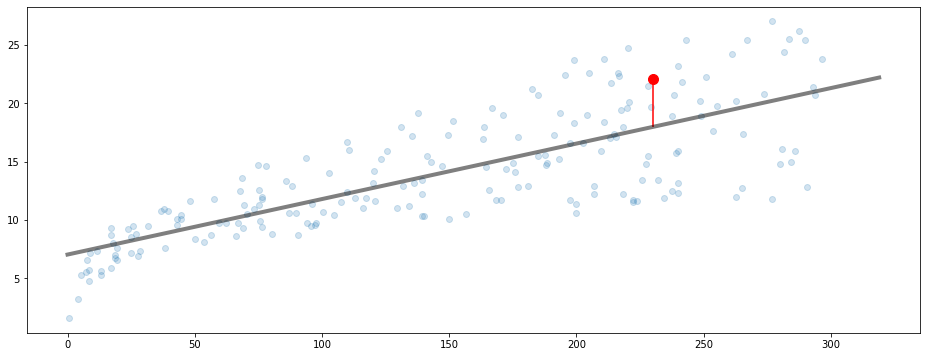

In [9]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
plt.plot(x_axis, y_line, color='black', linewidth=4, alpha=0.5)


y_hat = linreg.intercept + linreg.slope * some_point["TV"]
plt.scatter(some_point["TV"], some_point["sales"], color='red', s=100)
plt.vlines(some_point["TV"], some_point["sales"], y_hat, color='red')


### The Quality of the Regression: Correlation Coefficient

```python
>>> linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)
```

* The correlation coefficient for the relationship between TV and sales is rather high
   * TV advertising budget explains $r^2 = 0.61$ of the variance in the product's sales


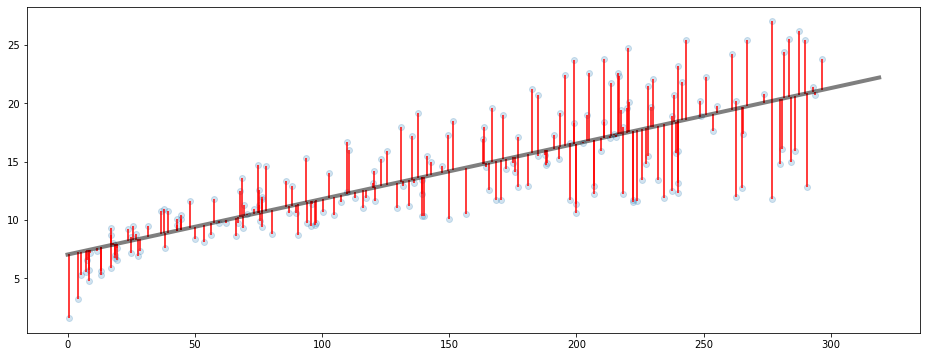

In [10]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
plt.plot(x_axis, y_line, color='black', linewidth=4, alpha=0.5)

for i in range(advertising.shape[0]):
    y_hat = linreg.intercept + linreg.slope * advertising.iloc[i]["TV"]
    #plt.scatter(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], color='red', s=100)
    plt.vlines(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], y_hat, color='red')


### The Model Error and the Residual Sum of Squares

* We can quantify how well a line fits the data simply by assessing the total error 
  * To avoid that error values cancel out, we compute the square of the error
* We call that the residual sum of squares (RSS)

$$
RSS = e_1^2 + e_2^2 + ... + e_n^2
$$





### Regression coefficients - Minimizing the RSS

* Naturally, we want the model that provides the smallest RSS for the data 
  * This is not always something we desire at any cost
    * A "database" or a hash table is a "model" which can provide RSS=0, yet, it's a bad model
      * Provide zero predictive power

* Since we are doing linear regression, we are concerned with finding the line with the smallest RSS
  * That line is the best model under the current assumption

### Regression coefficients - Minimizing the RSS - Cont'd 

<img src="https://www.dropbox.com/s/rmatv5vx7d4rdb1/RSS_Examples.png?dl=1" alt="drawing" style="width:900px;"/>


No handles with labels found to put in legend.


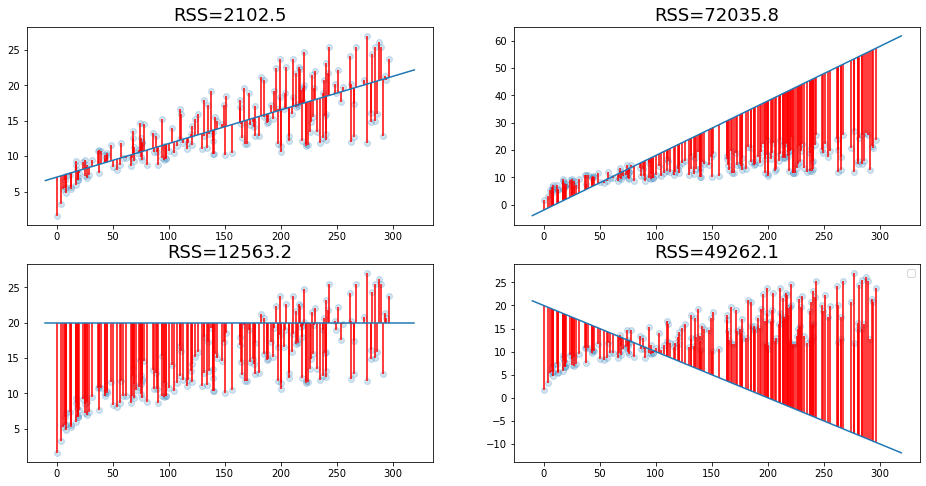

In [11]:
plt.figure(figsize=(16,8))


models = [(linreg.intercept, linreg.slope), (-2,0.2), (20,0), (20,-0.1)]

x_axis = np.arange(-10,320)

for (m, model) in enumerate(models):
    plt.subplot(2, 2, m+1)
    y_line = model[0] + model[1] * x_axis
    plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
    RSS = 0 
    for i in range(advertising.shape[0]):
        y_hat = model[0] + model[1]  * advertising.iloc[i]["TV"]
        #plt.scatter(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], color='red', s=100)
        plt.vlines(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], y_hat, color='red')    
        RSS += (y_hat - advertising.iloc[i]["sales"])**2
    plt.plot(x_axis, y_line)
    plt.title( "RSS={}".format(round(RSS,1)), fontsize=18)
    
plt.legend()
        

### Computing the RSS

* For linear regression, we can use calculus to arrive at the closed form solutions of $\beta_0$ and $\beta_1$ that minimize the RSS

* Minimize equation by finding where partial derivatives are equal to 0 


$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i -\bar{x})(y_i -\bar{y})}{\sum_{i=1}^{n} (x_i -\bar{x})^2}
$


$
\beta_0 = \bar{y} - \beta_1\bar{x}
$

* More on optimzation techniques later. 

* Given the data, we find the model, which parameters have the small RSS.
  * This is called training.


<img src="https://www.dropbox.com/s/wg3r2z7vfredtxh/curve.png?dl=1" alt="drawing" style="width:1000px;"/>

### Questions

* Our data are samples from a random process.
  * The data could have been different due to chance alone

* Getting new data may lead to different parameter estimates
  * if we repeat the same spending experiment, we will undoubtedly obtain different results
  
* How confident are we in our model estimates?

* How can we quantify our belief in our params?


### Confidence Interval in Model Parameters

* One way we have done this in a large dataset is by sampling a subset of data and repeating the computation of the model.
   * We control the uni(multi)verse!!!

  * Big data: we have so much data. We can assume we have a population that we can sample subsets form
    * Subsets can be without replacement.... plenty of data to use
  * Is small data or higher dimensional space subsample with replacement the same number of points
    * This is called bootstrapping
    * Illustrate the concept
  
  * Computing the 95% confidence interval of the model
    * Identify the range in which 95% of our estimates fall
    
    


### Confidence Interval in Model Parameters -- cont'd

![](https://www.dropbox.com/s/9411quj8bcbc4wv/conf_interval.png?dl=1)



### Example: Distribution of Intercepts

![](https://www.dropbox.com/s/1woeldmry1sy08s/dis_intercepts.png?dl=1)

In [49]:
print(advertising.shape)

(200, 4)


In [13]:
help(advertising.sample)

Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be

In [51]:
# bootstrapping the data (same sample size)
advertising.sample(advertising.shape[0], replace=True).head()

,TV,radio,newspaper,sales
103,187.9,17.2,17.9,14.7
73,129.4,5.7,31.3,11.0
9,199.8,2.6,21.2,10.6
151,121.0,8.4,48.7,11.6
92,217.7,33.5,59.0,19.4


In [52]:
advertising.sample(advertising.shape[0], replace=True).head()

,TV,radio,newspaper,sales
123,123.1,34.6,12.4,15.2
152,197.6,23.3,14.2,16.6
86,76.3,27.5,16.0,12.0
19,147.3,23.9,19.1,14.6
187,191.1,28.7,18.2,17.3


In [53]:
np.random.choice([1,2,3], size=3)

array([2, 1, 1])

In [54]:
bootstrap_intercepts = []
bootstrap_slopes = []

for i in range(50000):
    sample_indexes = np.random.choice(advertising.index, size=len(advertising.index))
    bootstrap_sample = advertising.iloc[sample_indexes]
    lr = linregress(bootstrap_sample["TV"], bootstrap_sample["sales"])    
    bootstrap_intercepts.append(round(lr.intercept, 3))
    bootstrap_slopes.append(round(lr.slope,3))

print("10 firt intercepts")    
print(bootstrap_intercepts[:10])
print("10 firt slopes")    
print(bootstrap_slopes[:10])

10 firt intercepts
[7.207, 6.79, 7.602, 7.373, 6.826, 6.904, 7.506, 6.867, 7.278, 7.002]
10 firt slopes
[0.047, 0.048, 0.047, 0.045, 0.049, 0.049, 0.044, 0.049, 0.05, 0.048]


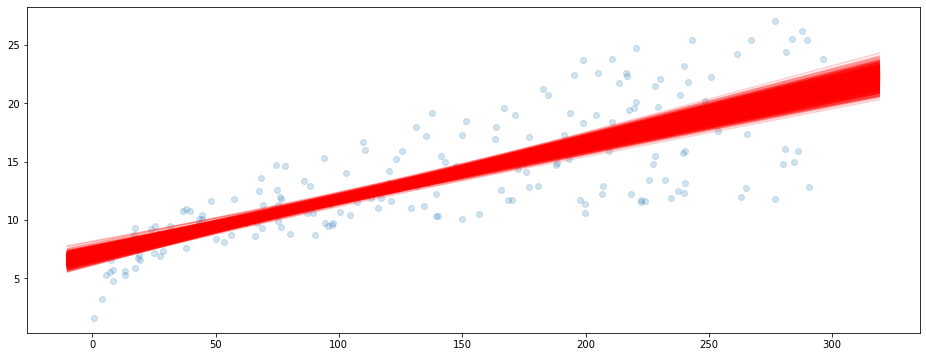

In [55]:
plt.figure(figsize=(16,6))

plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)

x_axis = np.arange(-10,320)

for i in np.random.choice(range(5000), 1000, replace=False):
    y_hat = bootstrap_intercepts[i] + bootstrap_slopes[i] * x_axis
    plt.plot(x_axis, y_hat, color='red', alpha=0.2)

[6.394 7.709]


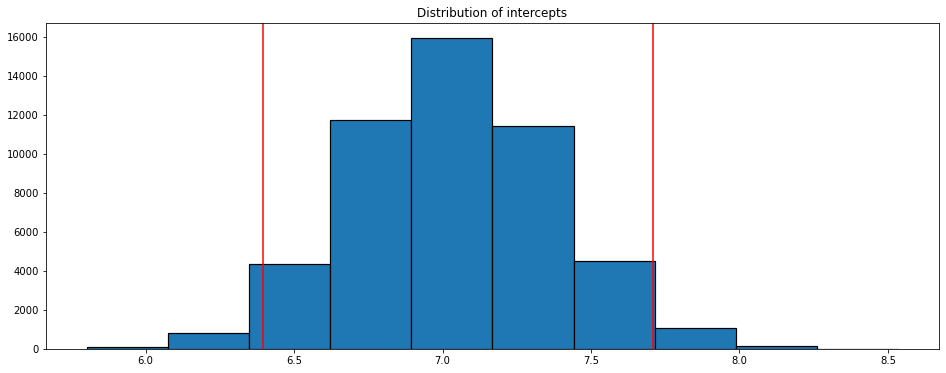

In [56]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_intercepts,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_intercepts, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")


[0.042 0.053]


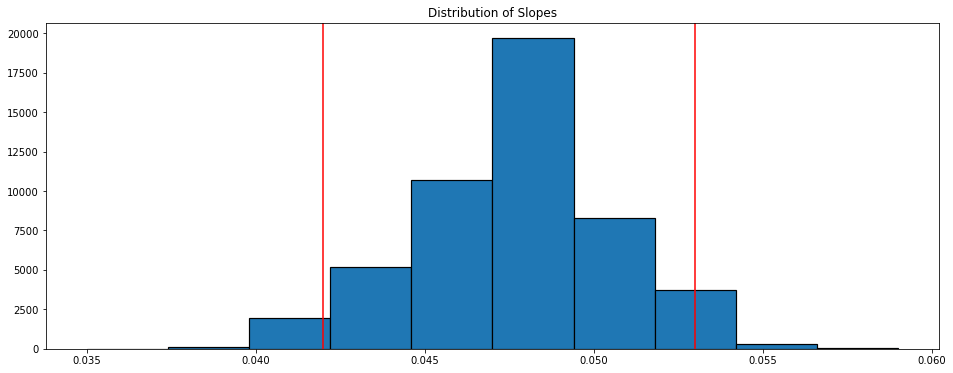

In [62]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_slopes,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of Slopes")

con_interval = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")


### Stats Model

* This information can be found using the Statsmodels package
  * We use ordinary least squares model to build the regression model
  
* Used the statistical language  $R$'s to describe the model
  * Here "~" can be interpreted as "a function of" or "depends on"
```python
sm.ols('sales ~ TV', advertising).fit()
```

* OLS here refers to Ordinary Least Squares, an estimator (method or algorithm) to find the model parameters
  * Minimizes the RSS


In [21]:
linreg = linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)

In [63]:

est = sm.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### Interpreting the Simple Linear Regression

* $\beta_0 = 7.03$

* The intercept is the expected mean value of y when x=0
  * If we spend $0 on V advertising,
  the we should expect, on average,  sales of 7.03 thousand units.  

* The intercept has no intrinsic meaning when x never equals 0
    
  
$\beta_1 = 0.0475$

*  $\beta_1$ quantifies the association between that variable and the response.
  * The **average** effect on the reponse (y) of a one unit increase in x
* Each $1,000 spent on TV advertising  is associated with an increase in sales of approximately 47.5 additional units/

In [26]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(est, alpha=0.05)

In [31]:
data.shape

(200, 12)

In [42]:
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

### Disambiguation of the Confidence Interval

* The 95% interval relates to the mean prediction $y$ for input $x$ 
  * i.e., the mean value for predictions of type $x$ will be in that confidence interval 
  * This is what we are after if we are in we are interested in the average behavior
* This is not to be confused with the 95% prediction interval of $y$
  * i.e., we are 95% confident that the true prediction will be in that interval
  * These are the interval we are typically interested if we are after extreme cases
  
 * See https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals
 and https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

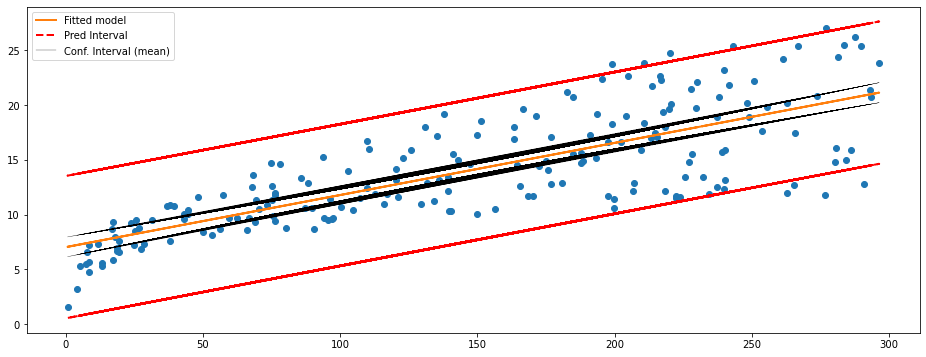

In [52]:
plt.figure(figsize=(16,6))
plt.plot(advertising["TV"], advertising["sales"], 'o')
plt.plot(advertising["TV"], fittedvalues, '-', lw=2, label="Fitted model")
plt.plot(advertising["TV"], predict_ci_low, 'r--', lw=2, label="Pred Interval")
plt.plot(advertising["TV"], predict_ci_upp, 'r--', lw=2)
plt.plot(advertising["TV"], predict_mean_ci_low, 'k-', lw=0.3, label="Conf. Interval (mean)")
plt.plot(advertising["TV"], predict_mean_ci_upp, 'k-', lw=0.3)
plt.legend()

In [ ]:
est = sm.ols('sales ~ TV', advertising).fit()


### Multiple Linear Regression

* How can we leverarage other information to predict sales 
  * Naive solution: Build independent regresison and combine results.
  
  
* Problems with the naive solution
  * Not completetely clear how to combine the data
    * Min or mean, median, etc.? why?
  * Each feature ignores the effect of the other features
    * Does not account for interactions
    


In [55]:
est = sm.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [56]:
est = sm.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Multiple Linear Regression 

* We re-write our linear regression equation to account for all variables

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon,
$$

* Where:
  * $p$ is the number of params (variables in the model)
  * $\beta_j$ is the mean effect on y for a unit increase in the predictor $x_i$, holding all the other values constant
  

* We an use stats model to compute the parms of the new model:

$$
sales = \beta_0 ~~+~~ \beta_1 \times \text{TV_budget} ~~+~~ \beta_2 \times \text{radio_budget} ~~+~~\beta_3 \times \text{newspaper_budget} ~~+~~ \epsilon,
$$


### Estimating the Regression Coefficients

<img src="https://www.dropbox.com/s/xi4tlz6oyg12pig/plane.png?dl=1">

In [57]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [58]:
est = sm.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        22:21:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Interpretation

<img src="https://www.dropbox.com/s/btz9dqkzdxkz5qy/results_table.png?dl=1" width=400>
<br/>
* For each additional $1k in TV advertising, we expect, on average, an increase in sales of 45 units

* For each additional $1k in radio advertising, we expect, on average, an increase in sales of 188 units

* The newspaper spending is not significant and does not contribute to the model
    * Why is it different from when tested independently?


### Interaction

* Simple linear regression predicts an effect of 0.0547
* Multiple linear regression predicts an effect of ~ 0
* Recall that the  correlation between radio and newspaper is ~0.35
    * Positive correlation indicating that in some cases, spending on radio advertising is accompanied by spending on newspaper  advertising

What is happening?

* radio advertising leads to increased sales
* radio and newspaper are correlated
  * radio avertising is accompanied by newspaper advertising
* We observe that an increase in newspaper advertising increase sales


### Some Important Concepts to Explore

* In the presence of dozens of predictors, the situation above become intractable manually
  * Which parameters are linked with which other params?

* Including effects that are not there results in  learning "the wrong thing"
  * Often referred to as overfitting
    
* "Identifying the best subset among many variables to include in a model – is arguably the hardest part of model building."
 This is discussed in depth in chapters 3 and of (Introduction to Statistical Learning)
